In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats

In [8]:
df2 = pd.read_csv("한국_방문_선택_시_고려요인.csv", encoding='cp949')
df2.head()

,통계분류(1),통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13
0,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
1,전체,소계,1398,20.1,12.7,11.4,4,3.9,1.5,1.4,1.4,1.1,0.7,0.6,0.4,41
2,월별,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,월별,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,월별,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37


In [9]:
df2.rename(columns = {"2021":"사례수","2021.1":"음식/미식탐방", "2021.2":"쇼핑", "2021.3":"자연 풍경 감상", "2021.4":"패션 유행 등 세련된 현대 문화 체험",
                       "2021.5":"역사/문화유적/전통문화 체험", "2021.6":"유흥/놀이 시설 체험", "2021.7":"치료 및 미용 서비스 체험", 
                       "2021.8":"여행 가능한 여가시간", "2021.9":"K-POP/한류스타 관련 공연팬미팅촬영지 등 체험", 
                       "2021.10":"레저 및 스포츠 활동", "2021.11":"자국과의 이동거리", "2021.12":"경제적인 여행비용","2021.13":"기타"}, inplace=True)
df2.head()

,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
1,전체,소계,1398,20.1,12.7,11.4,4,3.9,1.5,1.4,1.4,1.1,0.7,0.6,0.4,41
2,월별,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,월별,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,월별,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37


In [10]:
data_month = df2.iloc[2:14:,1:]
data_month.head()

,통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
2,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37
5,4월,86,19.8,12.8,17.4,5.8,0,1.2,3.5,0,0,1.2,0,0,38.4
6,5월,102,17.6,8.8,14.7,13.7,4.9,2,2,0,1,0,1,0,34.3


In [63]:
data_month.rename(columns = {"통계분류(2)":"월별"}, inplace=True)
data_month.head()

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117.0,18.8,16.2,11.1,10.3,1.7,0.0,0.0,3.4,0.0,0.9,0.0,0.0,37.6
1,2월,90.0,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0.0,0.0,1.1,0.0,34.4
2,3월,54.0,20.4,14.8,13.0,5.6,5.6,0.0,1.9,0.0,0.0,1.9,0.0,0.0,37.0
3,4월,86.0,19.8,12.8,17.4,5.8,0.0,1.2,3.5,0.0,0.0,1.2,0.0,0.0,38.4
4,5월,102.0,17.6,8.8,14.7,13.7,4.9,2.0,2.0,0.0,1.0,0.0,1.0,0.0,34.3


In [64]:
data_month.set_index('월별',inplace=True)
data_month = data_month.astype('float')   
data_month.reset_index(inplace=True)
data_month.head()

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117.0,18.8,16.2,11.1,10.3,1.7,0.0,0.0,3.4,0.0,0.9,0.0,0.0,37.6
1,2월,90.0,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0.0,0.0,1.1,0.0,34.4
2,3월,54.0,20.4,14.8,13.0,5.6,5.6,0.0,1.9,0.0,0.0,1.9,0.0,0.0,37.0
3,4월,86.0,19.8,12.8,17.4,5.8,0.0,1.2,3.5,0.0,0.0,1.2,0.0,0.0,38.4
4,5월,102.0,17.6,8.8,14.7,13.7,4.9,2.0,2.0,0.0,1.0,0.0,1.0,0.0,34.3


In [65]:
data_month_copy = data_month.copy()
data_month_copy['음식/미식탐방'] = data_month_copy['사례수']*data_month_copy['음식/미식탐방']/100
data_month_copy['쇼핑'] = data_month_copy['사례수']*data_month_copy['쇼핑']/100
data_month_copy['자연 풍경 감상'] = data_month_copy['사례수']*data_month_copy['자연 풍경 감상']/100
data_month_copy['패션 유행 등 세련된 현대 문화 체험'] = data_month_copy['사례수']*data_month_copy['패션 유행 등 세련된 현대 문화 체험']/100
data_month_copy['역사/문화유적/전통문화 체험'] = data_month_copy['사례수']*data_month_copy['역사/문화유적/전통문화 체험']/100
data_month_copy['유흥/놀이 시설 체험'] = data_month_copy['사례수']*data_month_copy['유흥/놀이 시설 체험']/100
data_month_copy['치료 및 미용 서비스 체험'] = data_month_copy['사례수']*data_month_copy['치료 및 미용 서비스 체험']/100
data_month_copy['여행 가능한 여가시간'] = data_month_copy['사례수']*data_month_copy['여행 가능한 여가시간']/100
data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'] = data_month_copy['사례수']*data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']/100
data_month_copy['레저 및 스포츠 활동'] = data_month_copy['사례수']*data_month_copy['레저 및 스포츠 활동']/100
data_month_copy['자국과의 이동거리'] = data_month_copy['사례수']*data_month_copy['자국과의 이동거리']/100
data_month_copy['경제적인 여행비용'] = data_month_copy['사례수']*data_month_copy['경제적인 여행비용']/100
data_month_copy['기타'] = data_month_copy['사례수']*data_month_copy['기타']/100
data_month_copy.head()

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117.0,21.996,18.954,12.987,12.051,1.989,0.000,0.000,3.978,0.00,1.053,0.00,0.0,43.992
1,2월,90.0,19.980,14.040,10.980,2.970,3.960,1.980,1.980,1.980,0.00,0.000,0.99,0.0,30.960
2,3월,54.0,11.016,7.992,7.020,3.024,3.024,0.000,1.026,0.000,0.00,1.026,0.00,0.0,19.980
3,4월,86.0,17.028,11.008,14.964,4.988,0.000,1.032,3.010,0.000,0.00,1.032,0.00,0.0,33.024
4,5월,102.0,17.952,8.976,14.994,13.974,4.998,2.040,2.040,0.000,1.02,0.000,1.02,0.0,34.986


In [14]:
data_month_copy = data_month_copy.round(0)

In [66]:
data_month_copy.iloc[::,1:].astype(int).head()

,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,117,21,18,12,12,1,0,0,3,0,1,0,0,43
1,90,19,14,10,2,3,1,1,1,0,0,0,0,30
2,54,11,7,7,3,3,0,1,0,0,1,0,0,19
3,86,17,11,14,4,0,1,3,0,0,1,0,0,33
4,102,17,8,14,13,4,2,2,0,1,0,1,0,34


In [16]:
data_month_copy.set_index('월별',inplace=True)
data_month_copy = data_month_copy.astype('int')   
data_month_copy.reset_index(inplace=True)
data_month_copy

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117,22,19,13,12,2,0,0,4,0,1,0,0,44
1,2월,90,20,14,11,3,4,2,2,2,0,0,1,0,31
2,3월,54,11,8,7,3,3,0,1,0,0,1,0,0,20
3,4월,86,17,11,15,5,0,1,3,0,0,1,0,0,33
4,5월,102,18,9,15,14,5,2,2,0,1,0,1,0,35
5,6월,64,13,5,7,4,1,0,3,1,0,0,0,0,30
6,7월,65,12,9,9,0,2,0,2,0,1,0,1,0,29
7,8월,116,12,12,8,0,6,2,0,0,0,1,0,0,75
8,9월,157,21,21,13,3,5,3,3,2,0,0,1,1,84
9,10월,156,23,15,17,4,8,3,0,2,0,1,1,2,80


In [17]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family'] = 'NanumGothic'

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\LG\.matplotlib


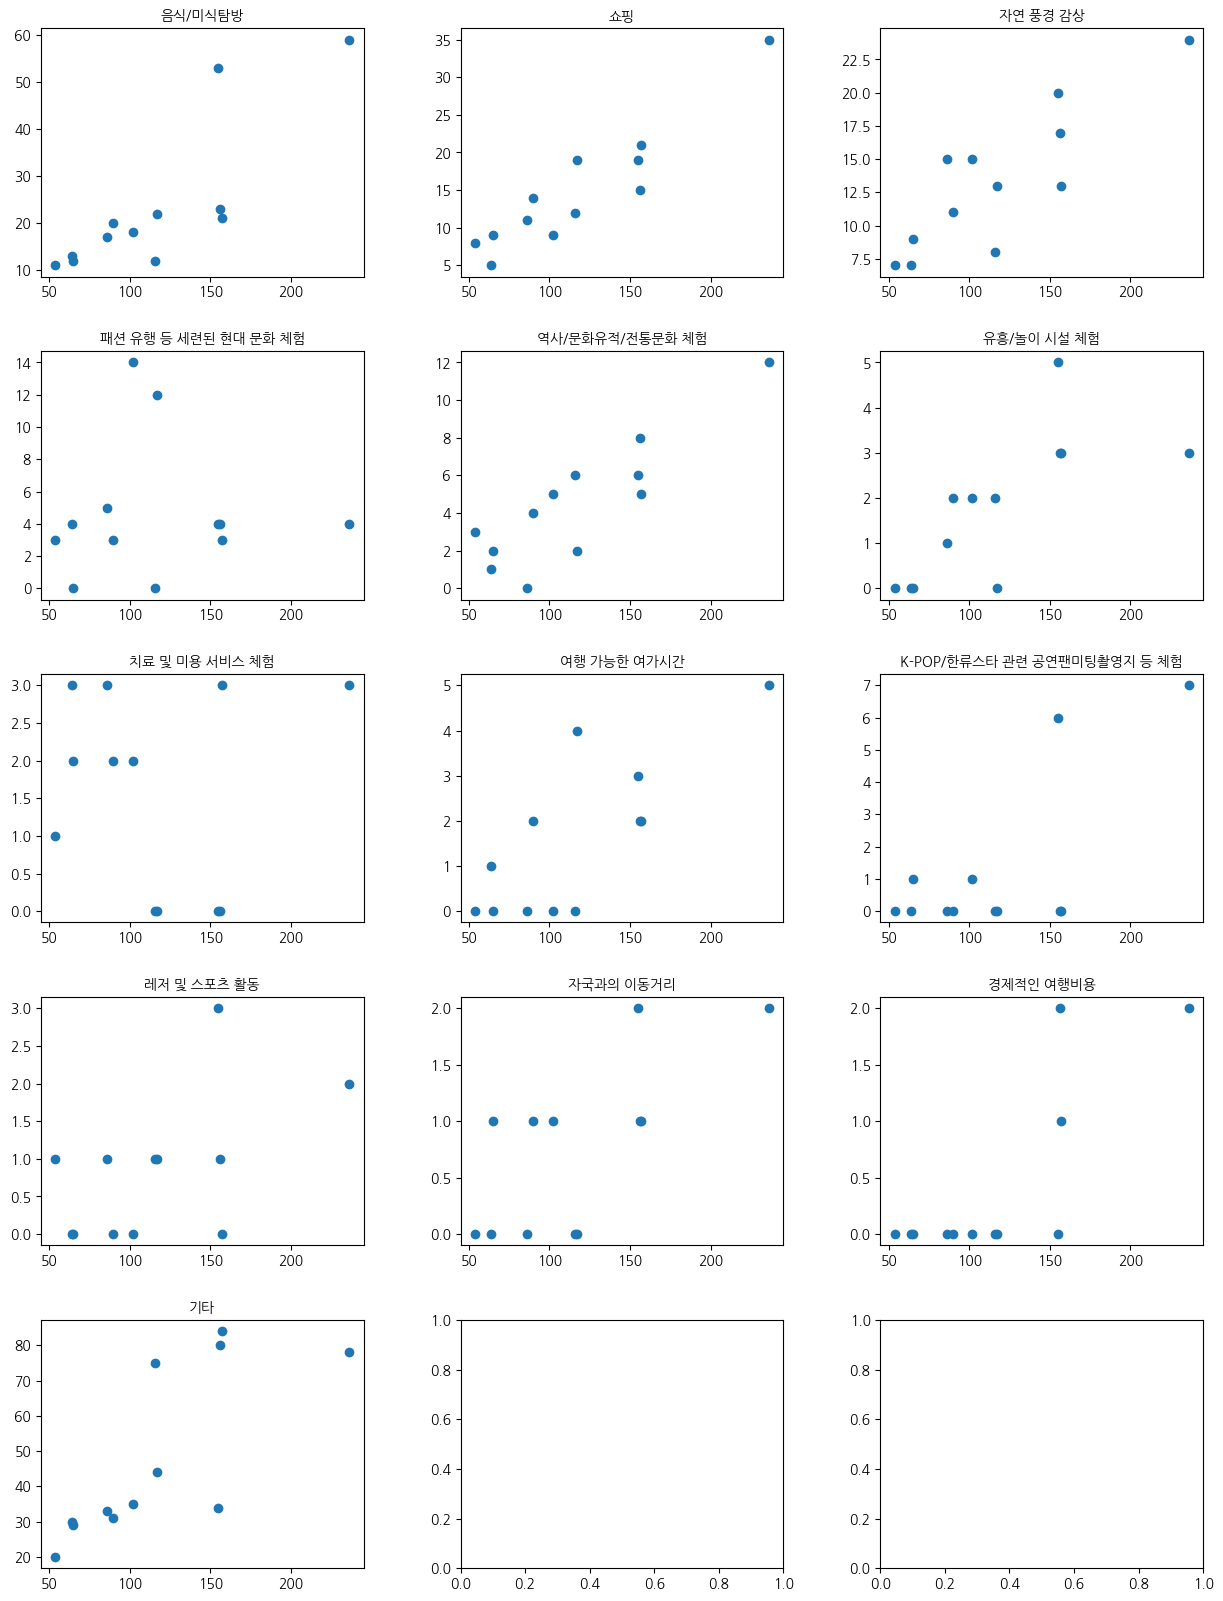

In [18]:
f, axes = plt.subplots(5, 3)
f.set_size_inches((15, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

axes[0, 0].set_title('음식/미식탐방', fontsize = 10)
axes[0, 0].scatter(x="사례수", y="음식/미식탐방", data=data_month_copy)

axes[0, 1].set_title('쇼핑', fontsize = 10)
axes[0, 1].scatter(x="사례수", y="쇼핑", data=data_month_copy)

axes[0, 2].set_title('자연 풍경 감상', fontsize = 10)
axes[0, 2].scatter(x="사례수", y="자연 풍경 감상", data=data_month_copy)

axes[1, 0].set_title('패션 유행 등 세련된 현대 문화 체험', fontsize = 10)
axes[1, 0].scatter(x="사례수", y="패션 유행 등 세련된 현대 문화 체험", data=data_month_copy)

axes[1, 1].set_title('역사/문화유적/전통문화 체험', fontsize = 10)
axes[1, 1].scatter(x="사례수", y="역사/문화유적/전통문화 체험", data=data_month_copy)

axes[1, 2].set_title('유흥/놀이 시설 체험', fontsize = 10)
axes[1, 2].scatter(x="사례수", y="유흥/놀이 시설 체험", data=data_month_copy)

axes[2, 0].set_title('치료 및 미용 서비스 체험', fontsize = 10)
axes[2, 0].scatter(x="사례수", y="치료 및 미용 서비스 체험", data=data_month_copy)

axes[2, 1].set_title('여행 가능한 여가시간', fontsize = 10)
axes[2, 1].scatter(x="사례수", y="여행 가능한 여가시간", data=data_month_copy)

axes[2, 2].set_title('K-POP/한류스타 관련 공연팬미팅촬영지 등 체험', fontsize = 10)
axes[2, 2].scatter(x="사례수", y="K-POP/한류스타 관련 공연팬미팅촬영지 등 체험", data=data_month_copy)

axes[3, 0].set_title('레저 및 스포츠 활동', fontsize = 10)
axes[3, 0].scatter(x="사례수", y="레저 및 스포츠 활동", data=data_month_copy)

axes[3, 1].set_title('자국과의 이동거리', fontsize = 10)
axes[3, 1].scatter(x="사례수", y="자국과의 이동거리", data=data_month_copy)

axes[3, 2].set_title('경제적인 여행비용', fontsize = 10)
axes[3, 2].scatter(x="사례수", y="경제적인 여행비용", data=data_month_copy)

axes[4, 0].set_title('기타', fontsize = 10)
axes[4, 0].scatter(x="사례수", y="기타", data=data_month_copy)
plt.show()

In [19]:
# '음식/미식탐방', '쇼핑', '자연 풍경 감상', '역사/문화유적/전통문화 체험', '유흥/놀이 시설 체험', '여행 가능한 여가시간', '기타'
# scatter plot을 분포 확인 -> column에서 양적 상관관계를 보임. 

In [20]:
cormat = data_month_copy.corr()
round(cormat,2)

,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
사례수,1.00,0.83,0.93,0.85,0.04,0.87,0.73,-0.02,0.77,0.70,0.56,0.70,0.79,0.76
음식/미식탐방,0.83,1.00,0.83,0.89,0.05,0.70,0.71,-0.02,0.79,0.94,0.78,0.82,0.49,0.29
쇼핑,0.93,0.83,1.00,0.79,0.02,0.75,0.56,0.07,0.87,0.71,0.54,0.65,0.67,0.62
자연 풍경 감상,0.85,0.89,0.79,1.00,0.26,0.68,0.71,0.03,0.69,0.78,0.65,0.77,0.62,0.40
패션 유행 등 세련된 현대 문화 체험,0.04,0.05,0.02,0.26,1.00,-0.09,-0.08,-0.06,0.19,-0.03,-0.06,-0.06,-0.12,-0.18
역사/문화유적/전통문화 체험,0.87,0.70,0.75,0.68,-0.09,1.00,0.69,-0.14,0.56,0.65,0.47,0.71,0.78,0.69
유흥/놀이 시설 체험,0.73,0.71,0.56,0.71,-0.08,0.69,1.00,-0.18,0.42,0.61,0.57,0.77,0.45,0.49
치료 및 미용 서비스 체험,-0.02,-0.02,0.07,0.03,-0.06,-0.14,-0.18,1.00,-0.08,0.03,-0.43,0.07,0.09,-0.06
여행 가능한 여가시간,0.77,0.79,0.87,0.69,0.19,0.56,0.42,-0.08,1.00,0.62,0.51,0.54,0.54,0.40
K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,0.70,0.94,0.71,0.78,-0.03,0.65,0.61,0.03,0.62,1.00,0.76,0.81,0.36,0.15


C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


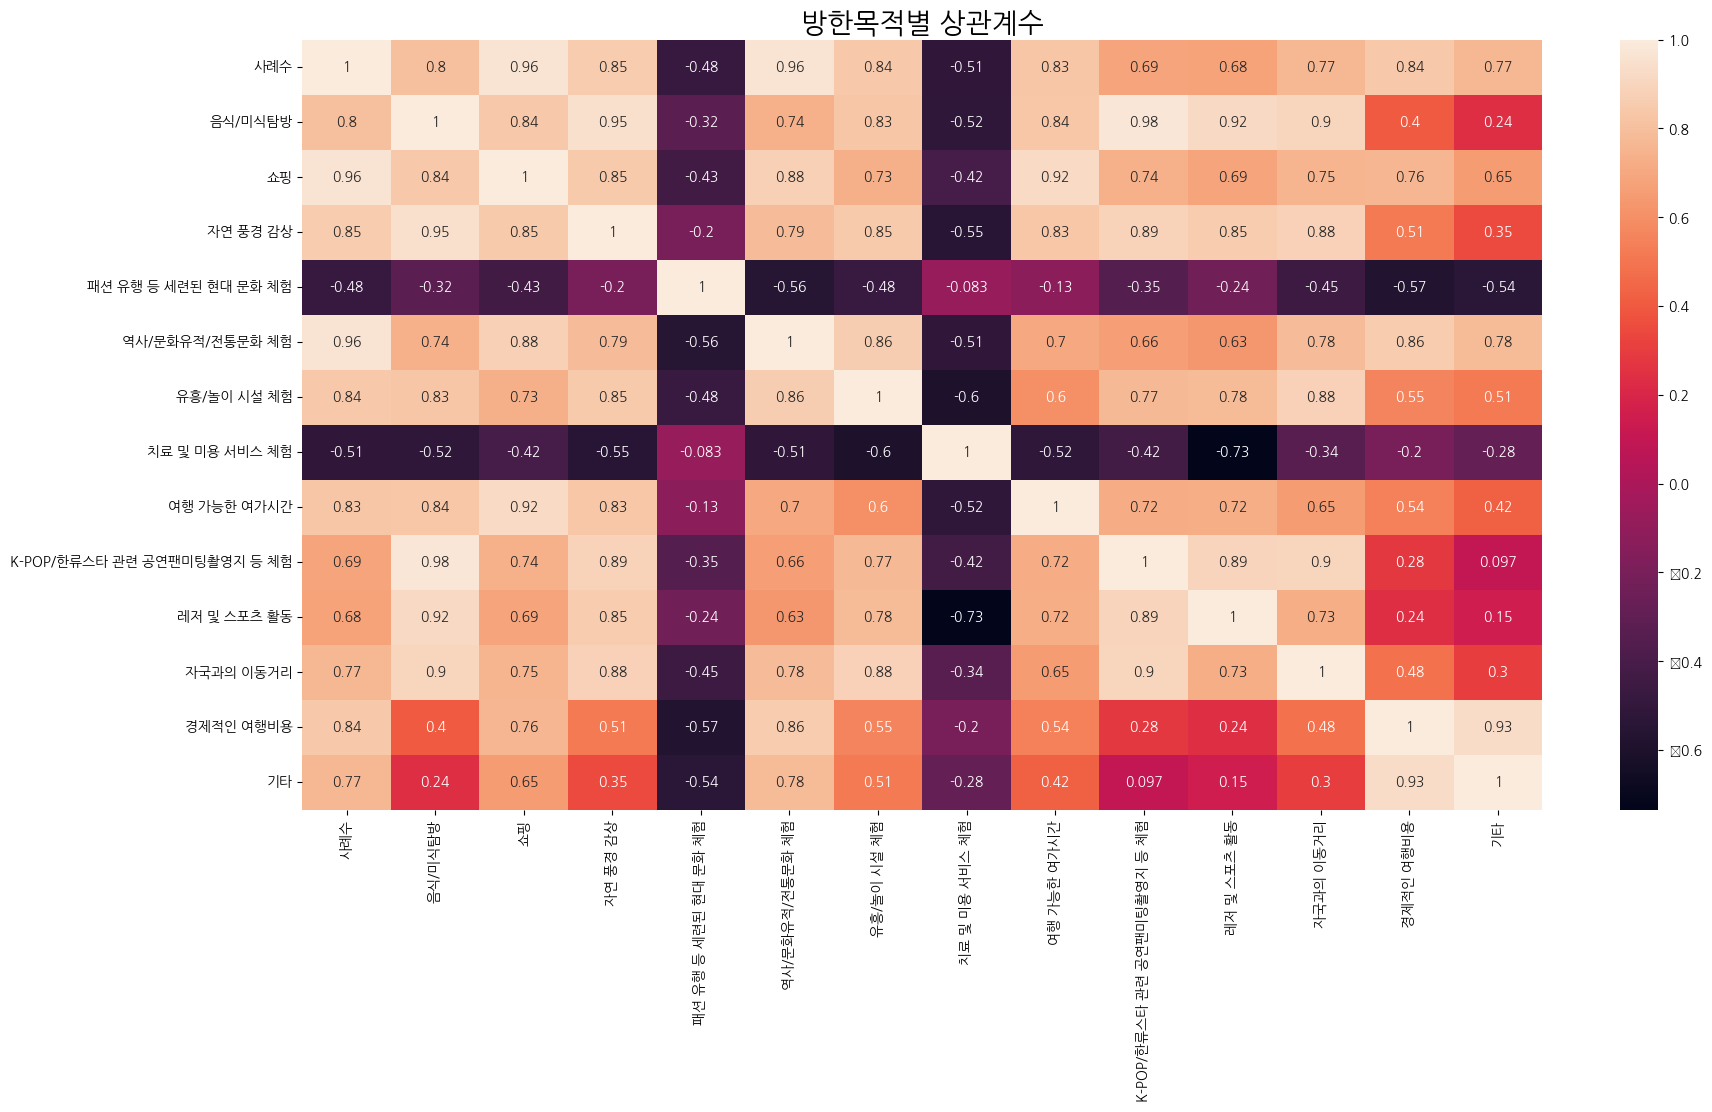

In [21]:
plt.figure(figsize=(20,10))
plt.title("방한목적별 상관계수", size = 20)
sns.heatmap(cormat.corr(),annot=True)
plt.show()

# 방한목적별 column들을 사례수와의 상관계수를 보기위해 heatmap 진행
# '패션 유행 등 세련된 현대 문화 체험'과 '치료 및 미용 서비스 체험'를 제외한 column에서 양적 상관관계를 보임을 알 수 있다. 
# scatter 분포에서 양적 상관관계 보였던 column이 양적 상관계수를 나타낸 것을 볼 수 있다. 

In [16]:
# K-콘텐츠에 대한 소비비중과 선호도의 분석을 바탕으로 K-콘텐츠와 방한목적과의 관계를 파악하기 위해 몇 가지 콘텐츠 종류를 선택함. 
# 소비비중과 선호도의 콘텐츠와 관련된 항목을 방한목적별 column에서 선택해 K-콘텐츠와 방한목적의 관계 분석을 진행 
# 방한목적 column으로는 '음식/미식탐방', '쇼핑', 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'을 택함. 

Text(0.5, 1.0, '사례수와 음식/미식탐방')

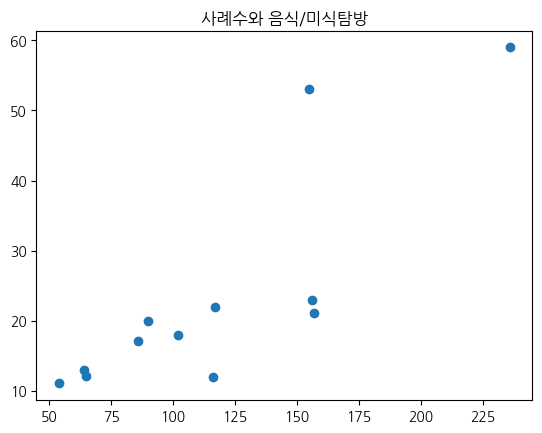

In [67]:
x = data_month_copy['사례수']
y = data_month_copy['음식/미식탐방']
plt.scatter(x, y)
plt.title('사례수와 음식/미식탐방')

In [83]:
stats.kendalltau(data_month_copy['사례수'], data_month_copy['음식/미식탐방'])

# sample의 size가 작기 때문에 kendall로 분석함. 
# p-value 값이 0.002로 0.05보다 작기 때문에 두 변수가 association이 있다. 
# 두 변수 사이에 association이 있기에 회귀분석을 진행한다. 

KendalltauResult(correlation=0.6666666666666666, pvalue=0.0018032758136924804)

In [102]:
data_month_copy.rename(columns = {'음식':'음식/미식탐방'}, inplace=True)

import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['음식/미식탐방'], X_const).fit()
model2.params
print(model2.summary())

# 회귀분석 모델이 적합한지를 보았을 때, 사례수가 음식/미식탐방을 68%정도 adjusted R-square값은 66%정도로 설명하고 있다. 
# p값이 0.000843로 0.05보다 작으므로 우연히 일어난 것이 아님을 알 수 있다. 
# 사례수가 증가함에 따라 음식/미식탐방이 0.25% 증가한다고 예측할 수 있다. 

    const    사례수
0     1.0  117.0
1     1.0   90.0
2     1.0   54.0
3     1.0   86.0
4     1.0  102.0
5     1.0   64.0
6     1.0   65.0
7     1.0  116.0
8     1.0  157.0
9     1.0  156.0
10    1.0  236.0
11    1.0  155.0
                            OLS Regression Results                            
Dep. Variable:                음식/미식탐방   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     22.01
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           0.000852
Time:                        00:36:42   Log-Likelihood:                -42.666
No. Observations:                  12   AIC:                             89.33
Df Residuals:                      10   BIC:                             90.30
Df Model:                           1                                         
Covariance Type:            nonrobust                               

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


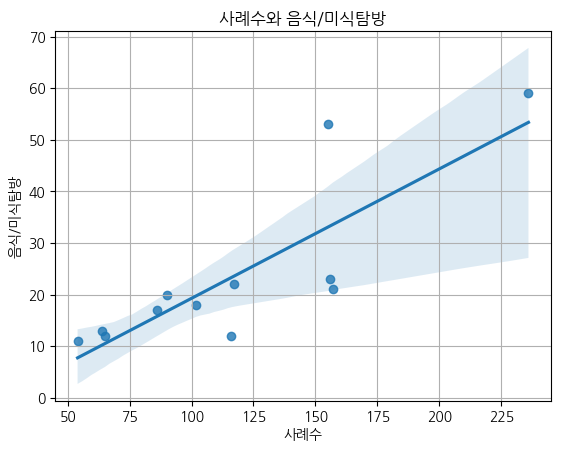

In [80]:
sns.regplot(x="사례수", y='음식/미식탐방', data=data_month_copy)
plt.title('사례수와 음식/미식탐방')
plt.grid()
plt.show()

In [ ]:
# 정확도를 높이기 위해 '음식/미식탐방'에 log를 취해서 다시 분석해본다. 

In [89]:
data_month_copy['음식/미식탐방_log'] = np.log(data_month_copy['음식/미식탐방'])

Text(0.5, 1.0, '사례수와 음식/미식탐방_log')

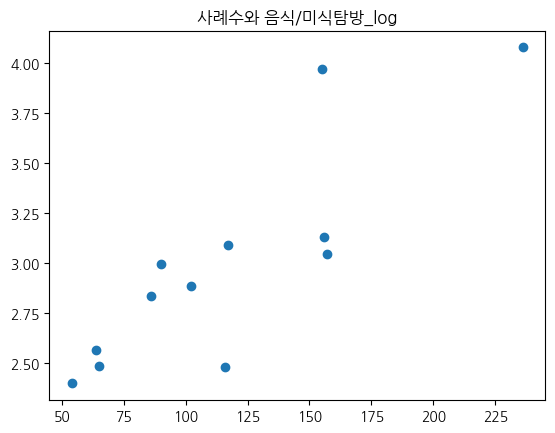

In [90]:
x = data_month_copy['사례수']
y = data_month_copy['음식/미식탐방_log']
plt.scatter(x, y)
plt.title('사례수와 음식/미식탐방_log')

In [91]:
print(stats.kendalltau(data_month_copy['사례수'], data_month_copy['음식/미식탐방_log']))

# p-value값이 0.002로 0.05보다 작기 때문에 두 변수 사이에 association이 있다고 할 수 있다. 
# 회귀분석 진행 

KendalltauResult(correlation=0.6666666666666666, pvalue=0.0018032758136924804)


In [92]:
X_const = sm.add_constant(x)
print(X_const)
model2 = sm.OLS(y, X_const).fit()
print(model2.summary())

#회귀분석 모델이 적합한지를 보았을 때, 사례수가 '음식/미식탐방'을 73%정도 adjusted R-square값은 70%정도로 설명하고 있다. 
#p값이 0.000415로 0.05보다 작으므로 우연히 일어난 것이 아님을 알 수 있다. 

# '음식/미식탐방'에 log를 취한 결과 사례수가 '음식/미식타방'을 68% -> 73%, adjusted R-square값은 66%->70%로 증가한 것을 알 수 있다. 
# 사례수가 '음식/미식탐방'을 설명하는 정확도가 올라간 것을 알 수 있다. 
# AIC 값이 89.33->6.760, BIC 값이 90.30->7.730으로 두 값 모두 감소한 것을 통해 log를 취한 후 model이 좋은 model로 선택할 수 있다. 

    const    사례수
0     1.0  117.0
1     1.0   90.0
2     1.0   54.0
3     1.0   86.0
4     1.0  102.0
5     1.0   64.0
6     1.0   65.0
7     1.0  116.0
8     1.0  157.0
9     1.0  156.0
10    1.0  236.0
11    1.0  155.0
                            OLS Regression Results                            
Dep. Variable:            음식/미식탐방_log   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     26.80
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           0.000415
Time:                        00:23:35   Log-Likelihood:                -1.3799
No. Observations:                  12   AIC:                             6.760
Df Residuals:                      10   BIC:                             7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                               

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


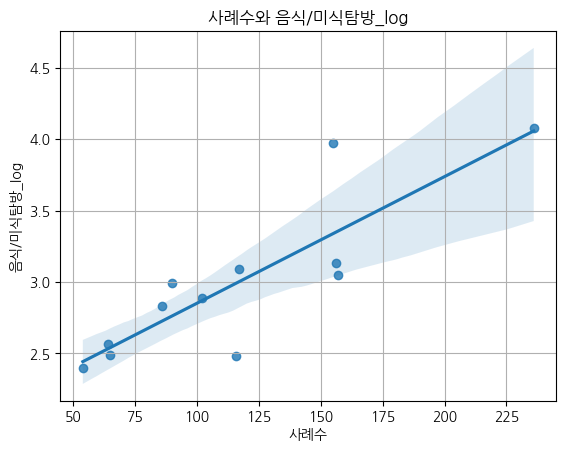

In [94]:
sns.regplot(x="사례수", y='음식/미식탐방_log', data=data_month_copy)
plt.title('사례수와 음식/미식탐방_log')
plt.grid()
plt.show()

# plot을 통해서도 line에 값들이 더 가깝게 분포된 모습을 볼 수 있다. 

In [ ]:
# 사례수와 쇼핑 

Text(0.5, 1.0, '사례수와 쇼핑')

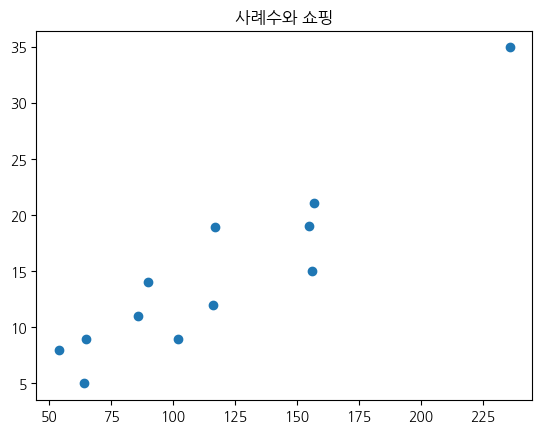

In [96]:
x = data_month_copy['사례수']
y = data_month_copy['쇼핑']
plt.scatter(x, y)
plt.title('사례수와 쇼핑')

In [98]:
print(stats.kendalltau(data_month_copy['사례수'], data_month_copy['쇼핑']))

# sample size가 작아 kendall로 분석한다. 
# p-value 값이 4.4129288920955584e-05 으로 0.05보다 작기 때문에 두 변수 사이에 association이 있다. 
# 회귀분석 진행 

KendalltauResult(correlation=0.8181818181818181, pvalue=4.4129288920955584e-05)


In [101]:
import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['쇼핑'], X_const).fit()
model2.params
print(model2.summary())

# 회귀분석 모델이 적합한지를 보았을 때, 사례수가 '쇼핑'을 86%정도 adjusted R-square값은 84%정도로 설명하고 있다. 
# p값이 1.50e-05 으로 0.05보다 작으므로 우연히 일어난 것이 아님을 알 수 있다. 
# 사례수가 증가함에 따라 쇼핑이 0.14% 증가한다고 예측할 수 있다. 

    const    사례수
0     1.0  117.0
1     1.0   90.0
2     1.0   54.0
3     1.0   86.0
4     1.0  102.0
5     1.0   64.0
6     1.0   65.0
7     1.0  116.0
8     1.0  157.0
9     1.0  156.0
10    1.0  236.0
11    1.0  155.0
                            OLS Regression Results                            
Dep. Variable:                     쇼핑   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     60.58
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.50e-05
Time:                        00:35:59   Log-Likelihood:                -29.810
No. Observations:                  12   AIC:                             63.62
Df Residuals:                      10   BIC:                             64.59
Df Model:                           1                                         
Covariance Type:            nonrobust                               

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


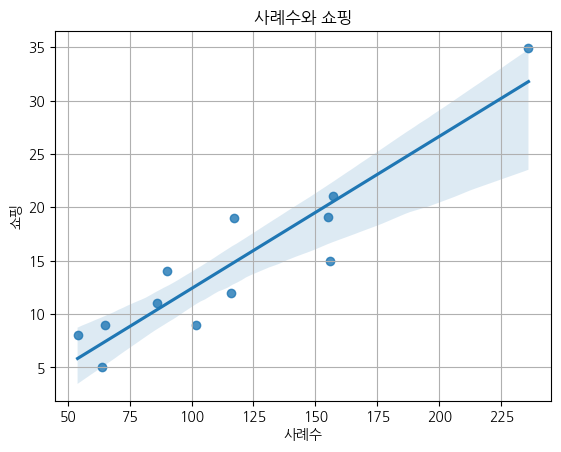

In [103]:
sns.regplot(x="사례수", y='쇼핑', data=data_month_copy)
plt.title('사례수와 쇼핑')
plt.grid()
plt.show()

# plot을 통해서 line에 값들이 더 가깝게 분포된 모습을 볼 수 있다. 

In [115]:
# 사례수와 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험

Text(0.5, 1.0, '사례수와 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험')

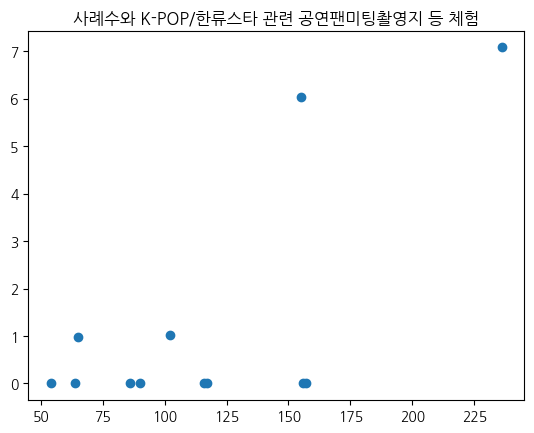

In [104]:
x = data_month_copy['사례수']
y = data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']
plt.scatter(x, y)
plt.title('사례수와 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험')


In [105]:
print(stats.kendalltau(data_month_copy['사례수'], data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']))

# sample size가 작아서 kendall로 분석한다. 
# p-value 값이 0.249로 0.05보다 큰 값을 나타내기 때문에 두 변수 사이에 association이 없다. 

KendalltauResult(correlation=0.2795530723408051, pvalue=0.24874887686356062)


In [ ]:
# 소비비중과 선호도 분석을 바탕으로 선택한 방한목적별 사례수의 관계 분석 결과 
# 음식/미식탐방, 쇼핑에서는 상관관계를 보였지만 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험에서는 상관관계를 보이지 못했다. 